<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Preprocesamiento de Datos para un Modelo de Clasificación

Nuestro equipo de riesgo ha identificado la necesidad de construir un modelo de clasificación para detectar transacciones potencialmente fraudulentas o anómalas. El éxito de este modelo permitirá identificar patrones en los datos y reducir pérdidas económicas para nuestros clientes y la empresa. Tu trabajo para hoy será preparar los datos proporcionados para desarrollar un modelo de clasificación que prediga la probabilidad de que una transacción sea “Normal” o “Anómala”, basándose en las características de las transacciones. Dentro de las tareas que tienes que realizar hoy deben estar incluidas las siguientes: 


1. **Análisis exploratorio de datos (EDA):**

   - Visualizar la distribución de las principales variables.

   - Explorar relaciones entre las características y la variable objetivo (`TransactionStatus`).


2. **Limpieza de datos:**

   - Identificar y tratar valores nulos.

   - Eliminar duplicados si existen.

   - Asegurar que las variables tienen el tipo de dato correcto.

   - etc. 

3. **Transformación de variables:**

   - Normalizar o escalar variables numéricas según sea necesario.

   - Codificar variables categóricas con técnicas como One-Hot Encoding, Target Encoding u Ordinal Encoding, según corresponda.

   - Crear variables derivadas útiles, como:

     - Frecuencia de transacciones de cada cliente.

     - Diferencia de tiempo entre transacciones consecutivas.

     - Ratio entre el saldo posterior y el monto de la transacción.

## Datos Proporcionados

El archivo de datos que analizarán contiene transacciones reales registradas por una compañia. A continuación, se describen las principales columnas que deberán preprocesar:

| Columna               | Descripción                                                                                     |
|-----------------------|-------------------------------------------------------------------------------------------------|
| `transaction_id`      | Identificador único de la transacción.                                                         |
| `customer_id`         | Identificador único del cliente que realizó la transacción.                                    |
| `merchant_id`         | Identificador único del comercio donde se realizó la transacción.                              |
| `amount`              | Monto de la transacción (en la moneda correspondiente).                                        |
| `transaction_time`    | Fecha y hora exacta en la que ocurrió la transacción.                                          |
| `is_fraudulent`       | Indicador de si la transacción fue fraudulenta (1: Sí, 0: No).                                 |
| `card_type`           | Tipo de tarjeta utilizada para la transacción (Visa, MasterCard, American Express, Discover).  |
| `location`            | Ubicación (ciudad o región) donde se realizó la transacción.                                   |
| `purchase_category`   | Categoría de la compra (por ejemplo, Gas Station, Online Shopping, Retail, etc.).              |
| `customer_age`        | Edad del cliente en el momento de la transacción.                                              |
| `transaction_description` | Descripción breve de la transacción, usualmente incluye el comercio asociado.              |


In [205]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_preprocesing as sp 

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

In [206]:
df=pd.read_csv("../data/financial_data.csv")

In [207]:
df.sample(5)

transaction_id  customer_id  merchant_id   amount     transaction_time  \
6288            6289         1087         2056  3240.06  2023-01-01 01:44:48   
8035            8036         1005         2066  8702.49  2023-01-01 02:13:55   
1658            1659         1036         2026  6139.81  2023-01-01 00:27:38   
8521            8522         1069         2012    69.32  2023-01-01 02:22:01   
2807            2808         1049         2015  1449.28  2023-01-01 00:46:47   

      is_fraudulent         card_type location purchase_category  \
6288              1        MasterCard  City-27         Groceries   
8035              0  American Express  City-41        Restaurant   
1658              0          Discover   City-9       Gas Station   
8521              1          Discover  City-23            Retail   
2807              1  American Express  City-11            Travel   

      customer_age    transaction_description  
6288            60  Purchase at Merchant-2056  
8035            46  Purchase at Merchant-2066  
1658            22  Purchase at Merchant-2026  
8521            69  Purchase at Merchant-2012  
2807            36  Purchase at Merchant-2015

In [208]:
categorical_columns = ["transaction_id", "customer_id", "merchant_id"]
df[categorical_columns] = df[categorical_columns].astype(object)

In [209]:
# Convert 'transaction_time' to datetime for proper time calculations
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [210]:
sp.exploracion_basica_dataframe(df)

El número de datos es 10000 y el de columnas es 11

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 0

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


count  % unique
transaction_id           10000    100.00
transaction_time         10000    100.00
amount                    9945     99.45
merchant_id                100      1.00
customer_id                100      1.00
transaction_description    100      1.00
customer_age                53      0.53
location                    50      0.50
purchase_category            6      0.06
card_type                    4      0.04
is_fraudulent                2      0.02

Las columnas con más del 50% de valores unicos son:
transaction_id
transaction_time
amount

 ------------------------------- 

Las columnas con solo 1 valor único son:

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


Empty DataFrame
Columns: [count, % nulos]
Index: []

Las columnas con más del 50% de valores nulos son:

 ------------------------------- 

Los tipos de las columnas son:


tipo_dato
transaction_id                   object
customer_id                      object
merchant_id                      object
amount                          float64
transaction_time         datetime64[ns]
is_fraudulent                     int64
card_type                        object
location                         object
purchase_category                object
customer_age                      int64
transaction_description          object


 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


columna
0           transaction_id
1              customer_id
2              merchant_id
3                card_type
4                 location
5        purchase_category
6  transaction_description


 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


columna
0         amount
1  is_fraudulent
2   customer_age


 ------------------------------- 

La columna TRANSACTION_ID tiene las siguientes valore únicos:


count  porcentaje (%)
transaction_id                       
9984                1            0.01
9983                1            0.01
9982                1            0.01
9981                1            0.01
9980                1            0.01
...               ...             ...
5                   1            0.01
4                   1            0.01
3                   1            0.01
2                   1            0.01
1                   1            0.01

[10000 rows x 2 columns]


 ------------------------------- 

La columna CUSTOMER_ID tiene las siguientes valore únicos:


count  porcentaje (%)
customer_id                       
1074           126            1.26
1085           120            1.20
1059           118            1.18
1018           116            1.16
1099           116            1.16
...            ...             ...
1027            85            0.85
1092            84            0.84
1066            84            0.84
1033            81            0.81
1003            81            0.81

[100 rows x 2 columns]


 ------------------------------- 

La columna MERCHANT_ID tiene las siguientes valore únicos:


count  porcentaje (%)
merchant_id                       
2016           120            1.20
2078           120            1.20
2055           118            1.18
2019           117            1.17
2057           117            1.17
...            ...             ...
2033            82            0.82
2045            82            0.82
2031            80            0.80
2070            75            0.75
2100            75            0.75

[100 rows x 2 columns]


 ------------------------------- 

La columna CARD_TYPE tiene las siguientes valore únicos:


count  porcentaje (%)
card_type                              
Discover           2633           26.33
American Express   2494           24.94
Visa               2490           24.90
MasterCard         2383           23.83


 ------------------------------- 

La columna LOCATION tiene las siguientes valore únicos:


count  porcentaje (%)
location                       
City-7      223            2.23
City-40     221            2.21
City-14     218            2.18
City-32     218            2.18
City-41     218            2.18
City-24     217            2.17
City-20     215            2.15
City-4      213            2.13
City-22     213            2.13
City-45     211            2.11
City-5      210            2.10
City-43     210            2.10
City-39     209            2.09
City-13     209            2.09
City-37     209            2.09
City-12     209            2.09
City-23     209            2.09
City-25     207            2.07
City-28     207            2.07
City-42     206            2.06
City-47     206            2.06
City-17     205            2.05
City-50     202            2.02
City-49     202            2.02
City-48     202            2.02
City-19     201            2.01
City-9      200            2.00
City-11     199            1.99
City-29     197            1.97
City-33     196            1.96
City-46     196            1.96
City-3      195            1.95
City-10     194            1.94
City-18     194            1.94
City-26     192            1.92
City-30     191            1.91
City-21     191            1.91
City-38     191            1.91
City-34     191            1.91
City-27     191            1.91
City-6      190            1.90
City-44     189            1.89
City-8      188            1.88
City-1      188            1.88
City-16     186            1.86
City-2      185            1.85
City-15     184            1.84
City-31     177            1.77
City-36     167            1.67
City-35     158            1.58


 ------------------------------- 

La columna PURCHASE_CATEGORY tiene las siguientes valore únicos:


count  porcentaje (%)
purchase_category                       
Travel              1694           16.94
Groceries           1692           16.92
Gas Station         1666           16.66
Retail              1661           16.61
Online Shopping     1651           16.51
Restaurant          1636           16.36


 ------------------------------- 

La columna TRANSACTION_DESCRIPTION tiene las siguientes valore únicos:


count  porcentaje (%)
transaction_description                         
Purchase at Merchant-2016    120            1.20
Purchase at Merchant-2078    120            1.20
Purchase at Merchant-2055    118            1.18
Purchase at Merchant-2019    117            1.17
Purchase at Merchant-2057    117            1.17
...                          ...             ...
Purchase at Merchant-2033     82            0.82
Purchase at Merchant-2045     82            0.82
Purchase at Merchant-2031     80            0.80
Purchase at Merchant-2070     75            0.75
Purchase at Merchant-2100     75            0.75

[100 rows x 2 columns]


 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna AMOUNT tiene las siguientes valore únicos:


count  porcentaje (%)
amount                        
1178.56      2            0.02
38.83        2            0.02
304.25       2            0.02
1407.72      2            0.02
4472.38      2            0.02
...        ...             ...
7102.77      1            0.01
833.19       1            0.01
3361.80      1            0.01
3321.65      1            0.01
7619.05      1            0.01

[9945 rows x 2 columns]


 ------------------------------- 

La columna IS_FRAUDULENT tiene las siguientes valore únicos:


count  porcentaje (%)
is_fraudulent                       
1               5068           50.68
0               4932           49.32


 ------------------------------- 

La columna CUSTOMER_AGE tiene las siguientes valore únicos:


count  porcentaje (%)
customer_age                       
62              228            2.28
50              215            2.15
68              212            2.12
25              208            2.08
45              208            2.08
19              204            2.04
41              204            2.04
55              203            2.03
30              203            2.03
42              203            2.03
36              202            2.02
23              201            2.01
53              200            2.00
22              200            2.00
35              198            1.98
70              197            1.97
69              197            1.97
24              196            1.96
29              194            1.94
21              194            1.94
61              194            1.94
58              193            1.93
51              193            1.93
34              192            1.92
48              192            1.92
65              192            1.92
44              190            1.90
60              189            1.89
32              188            1.88
54              186            1.86
47              186            1.86
46              186            1.86
52              185            1.85
64              184            1.84
37              182            1.82
39              181            1.81
40              181            1.81
49              180            1.80
66              179            1.79
43              178            1.78
20              178            1.78
63              174            1.74
27              174            1.74
18              173            1.73
56              173            1.73
28              172            1.72
38              169            1.69
31              169            1.69
67              168            1.68
26              167            1.67
33              165            1.65
59              164            1.64
57              156            1.56


 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [211]:
df.head(1)

transaction_id customer_id merchant_id   amount transaction_time  \
0              1        1082        2027  5758.59       2023-01-01   

   is_fraudulent   card_type location purchase_category  customer_age  \
0              0  MasterCard  City-30       Gas Station            43   

     transaction_description  
0  Purchase at Merchant-2027

In [212]:
df=df.drop(columns=["transaction_description","transaction_id", "customer_id", "merchant_id", "transaction_time"])

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:163: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_counts = pd.concat([category_counts, null_series])
c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:163: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when d

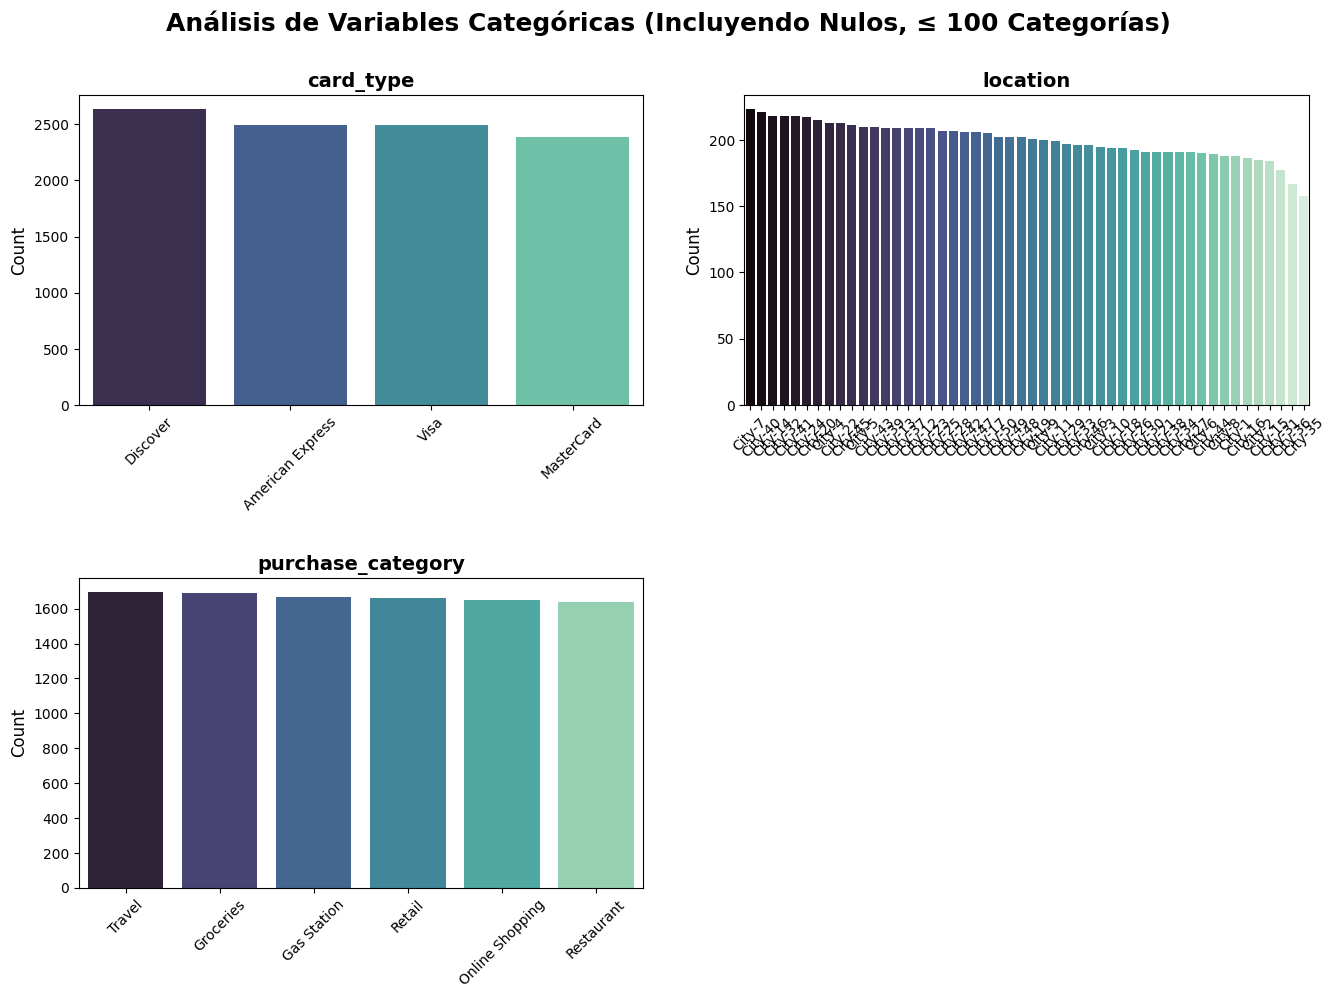

In [213]:
sp.plot_categoricas(df,max_categories=  100)

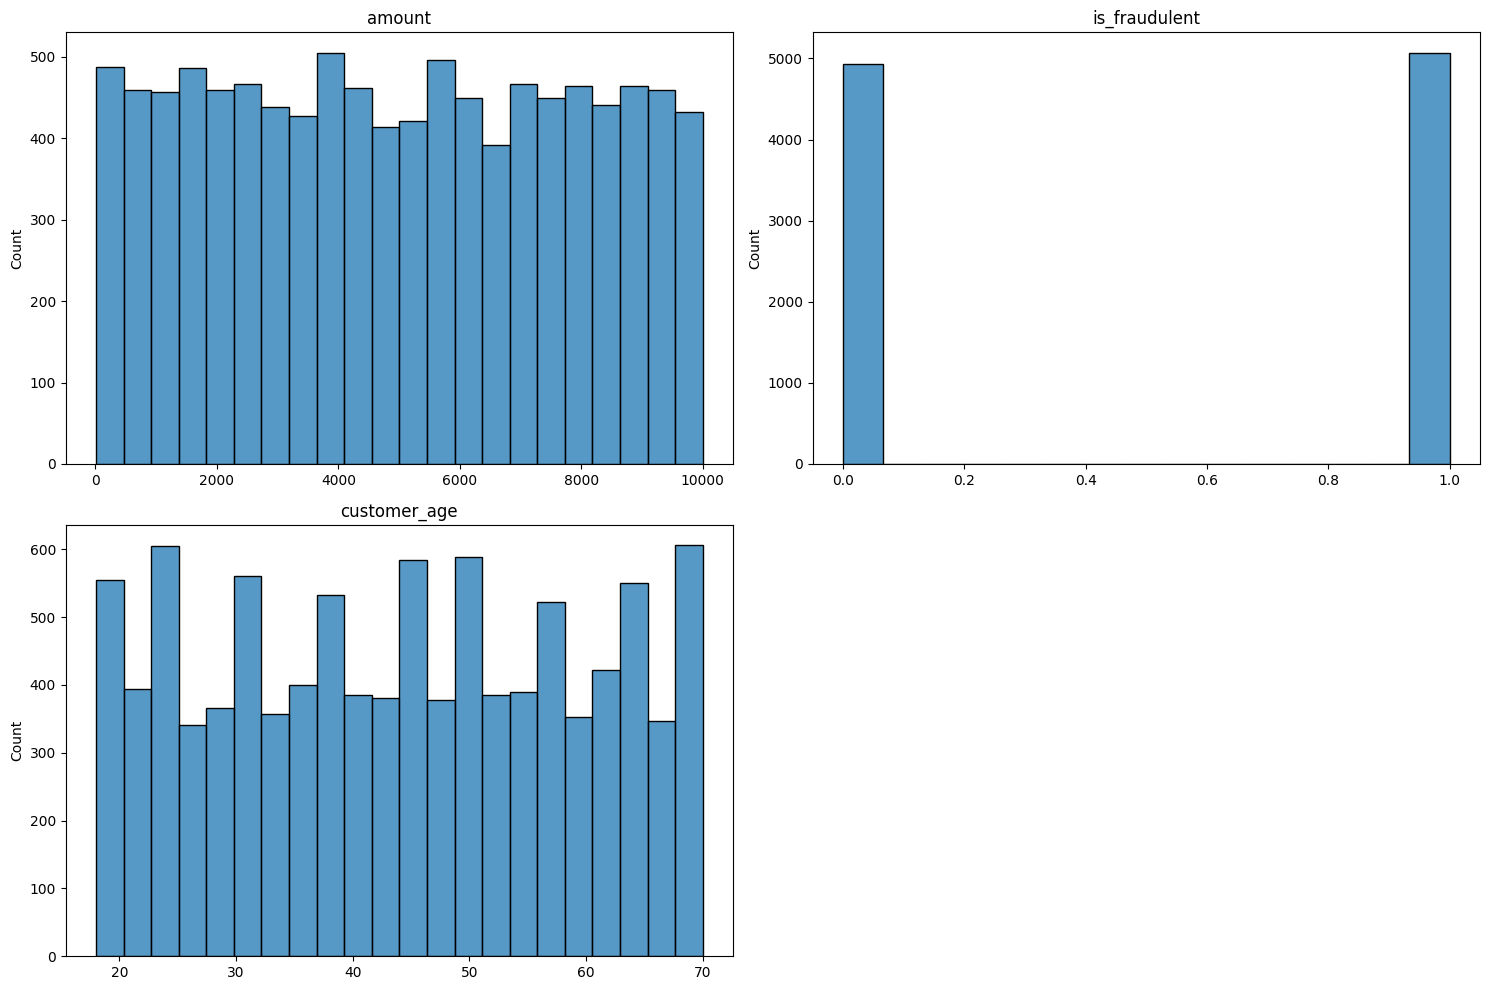

In [214]:
sp.plot_numericas(df)

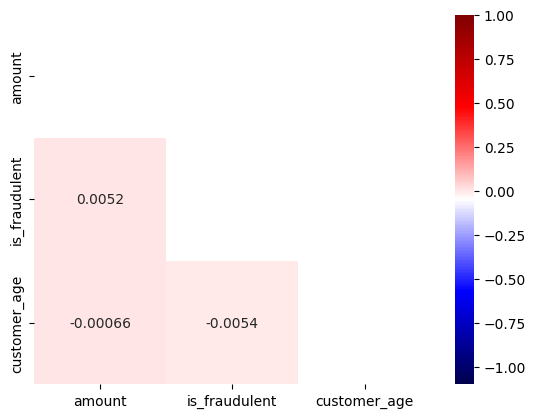

<Figure size 1000x1500 with 0 Axes>

In [215]:
sp.matriz_correlacion(df)

In [216]:
sp.ANOVA(df,"is_fraudulent")

{'amount':                         sum_sq      df         F   PR(>F)
 C(is_fraudulent)  2.234266e+06     1.0  0.265703  0.60624
 Residual          8.407194e+10  9998.0       NaN      NaN,
 'is_fraudulent':                         sum_sq      df             F  PR(>F)
 C(is_fraudulent)  2.499538e+03     1.0  1.147601e+31     0.0
 Residual          2.177619e-24  9998.0           NaN     NaN,
 'customer_age':                         sum_sq      df         F    PR(>F)
 C(is_fraudulent)  6.815103e+01     1.0  0.290287  0.590049
 Residual          2.347244e+06  9998.0       NaN       NaN}

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:276: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


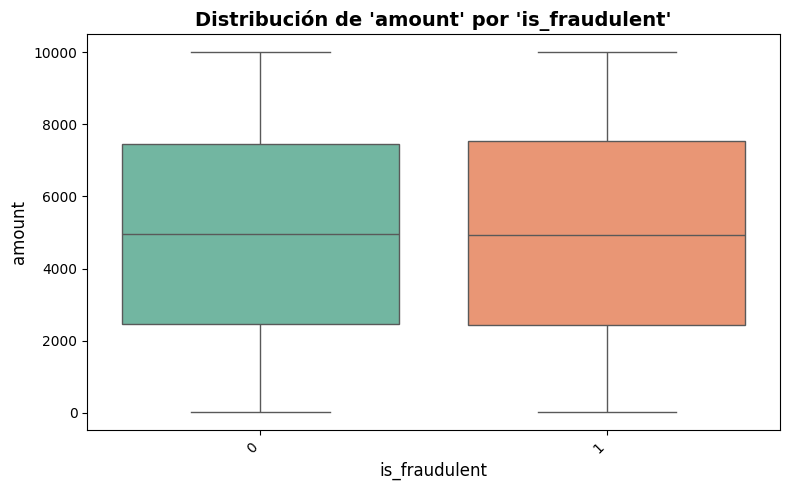

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:276: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


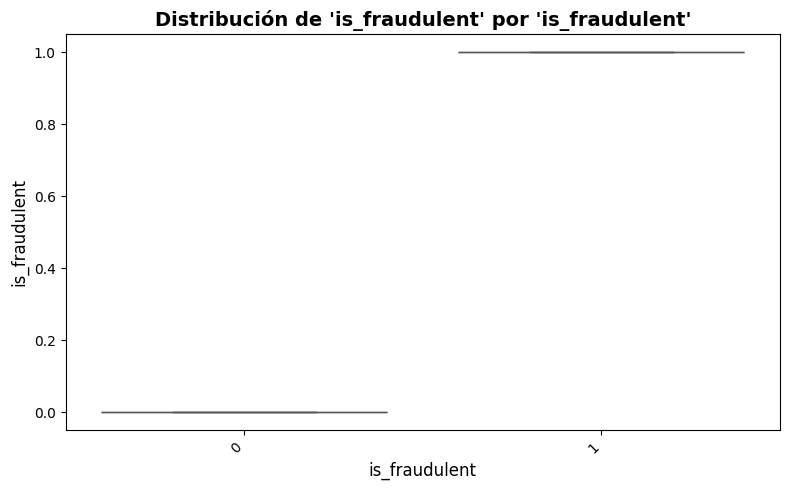

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:276: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


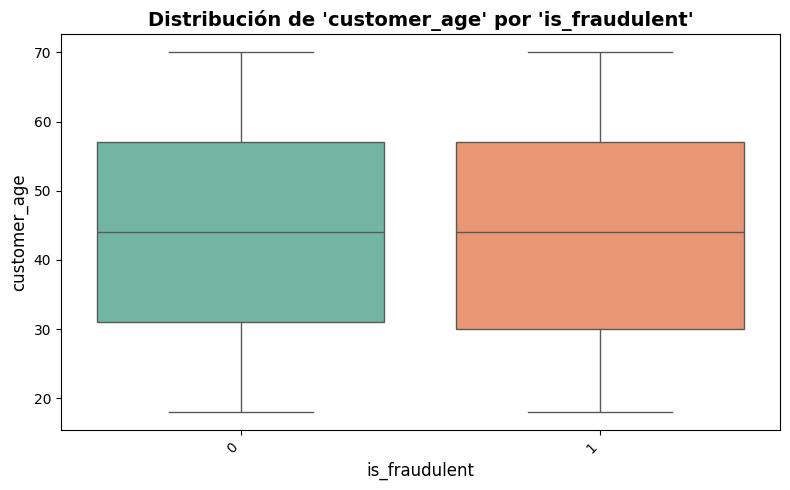

In [217]:
sp.relacion_vr_numericas_boxplot(df, "is_fraudulent")

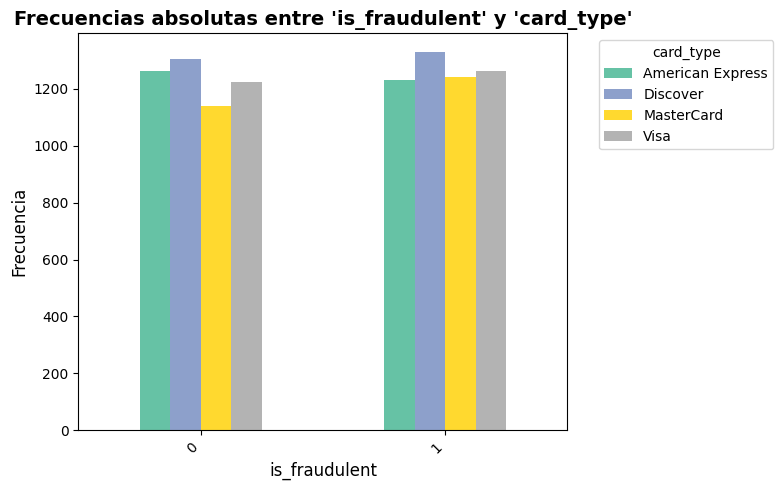

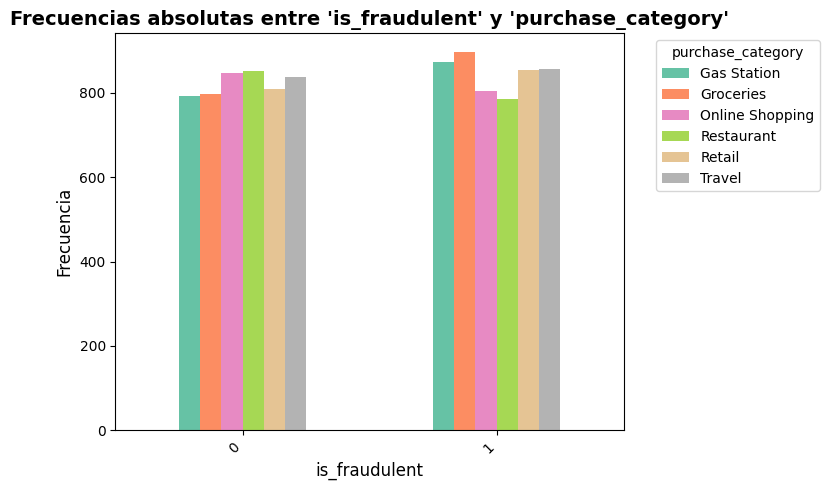

In [218]:
sp.relacion_vr_categoricas_barras_agrupadas(df, "is_fraudulent")

In [219]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

amount               0
is_fraudulent        0
card_type            0
location             0
purchase_category    0
customer_age         0
dtype: int64


### Gestion de Outiers

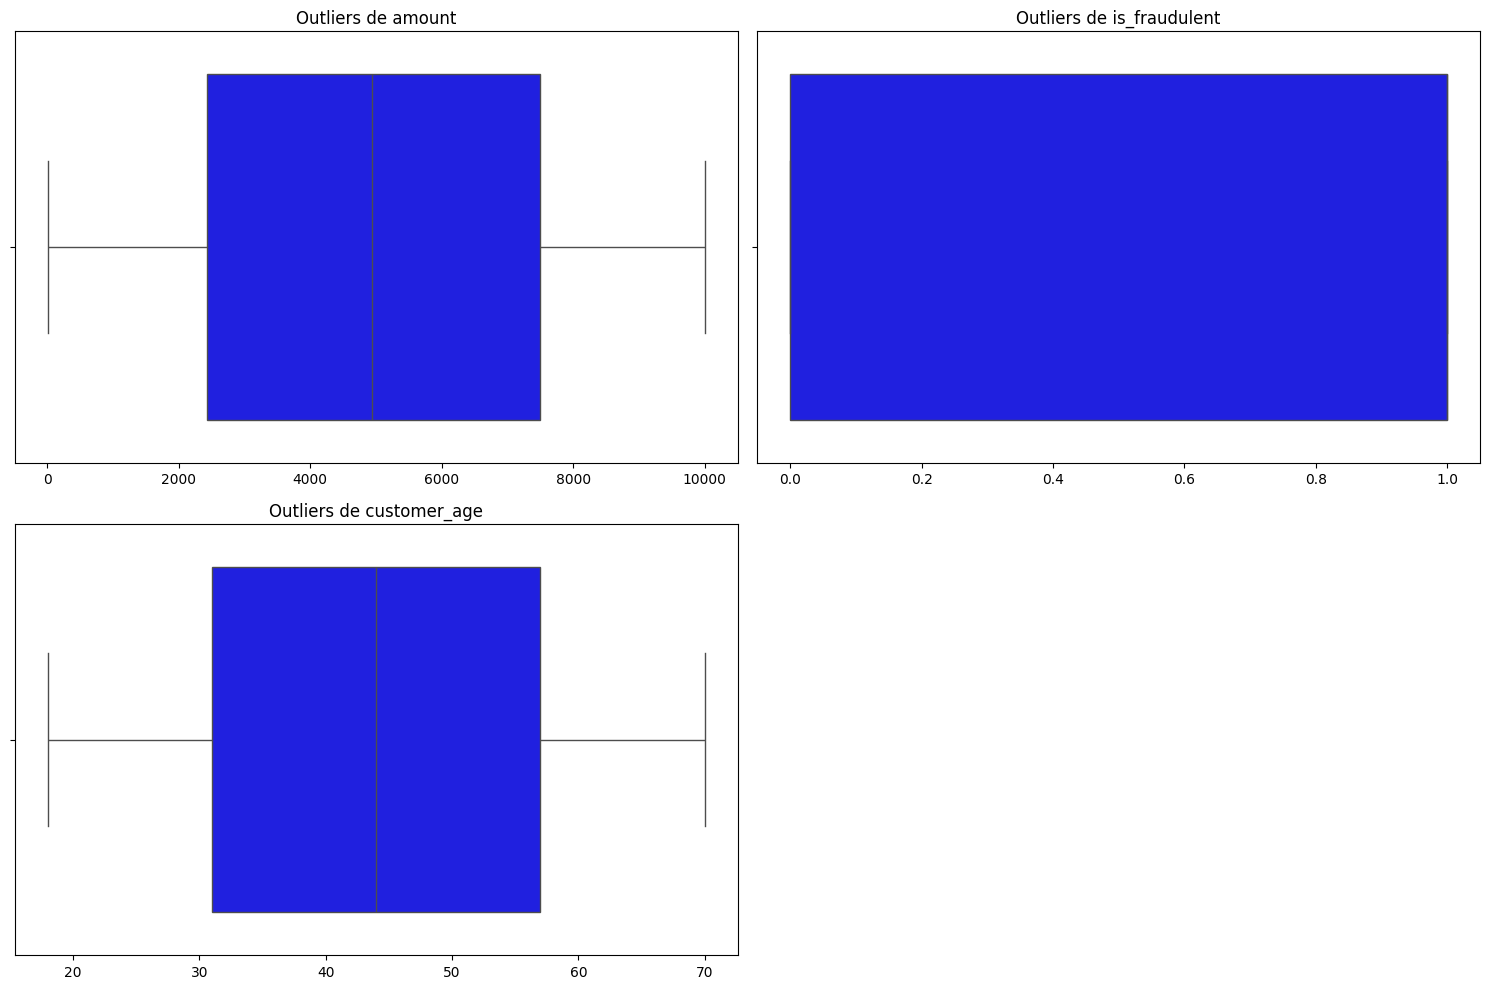

In [220]:
sp.detectar_outliers(df)

In [221]:
col_numericas=["customer_age","amount"]
lista_vecinos=[5, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 9/9 [00:00<00:00, 14.31it/s]


In [222]:
df_lof.describe().T

count         mean          std    min       25%  \
amount                10000.0  4958.381617  2899.699675  10.61  2438.175   
is_fraudulent         10000.0     0.506800     0.499979   0.00     0.000   
customer_age          10000.0    44.047500    15.321707  18.00    31.000   
outliers_lof_5_0.01   10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_5_0.05   10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_5_0.1    10000.0     0.800000     0.600030  -1.00     1.000   
outliers_lof_20_0.01  10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_20_0.05  10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_20_0.1   10000.0     0.800000     0.600030  -1.00     1.000   
outliers_lof_50_0.01  10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_50_0.05  10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_50_0.1   10000.0     0.800000     0.600030  -1.00     1.000   

                           50%        75%      max  
amount                4943.945  7499.3125  9999.75  
is_fraudulent            1.000     1.0000     1.00  
customer_age            44.000    57.0000    70.00  
outliers_lof_5_0.01      1.000     1.0000     1.00  
outliers_lof_5_0.05      1.000     1.0000     1.00  
outliers_lof_5_0.1       1.000     1.0000     1.00  
outliers_lof_20_0.01     1.000     1.0000     1.00  
outliers_lof_20_0.05     1.000     1.0000     1.00  
outliers_lof_20_0.1      1.000     1.0000     1.00  
outliers_lof_50_0.01     1.000     1.0000     1.00  
outliers_lof_50_0.05     1.000     1.0000     1.00  
outliers_lof_50_0.1      1.000     1.0000     1.00

In [223]:
combinaciones_variables = list(combinations(["customer_age","amount"], 2))
columnas_hue = df_lof.filter(like="outlier").columns


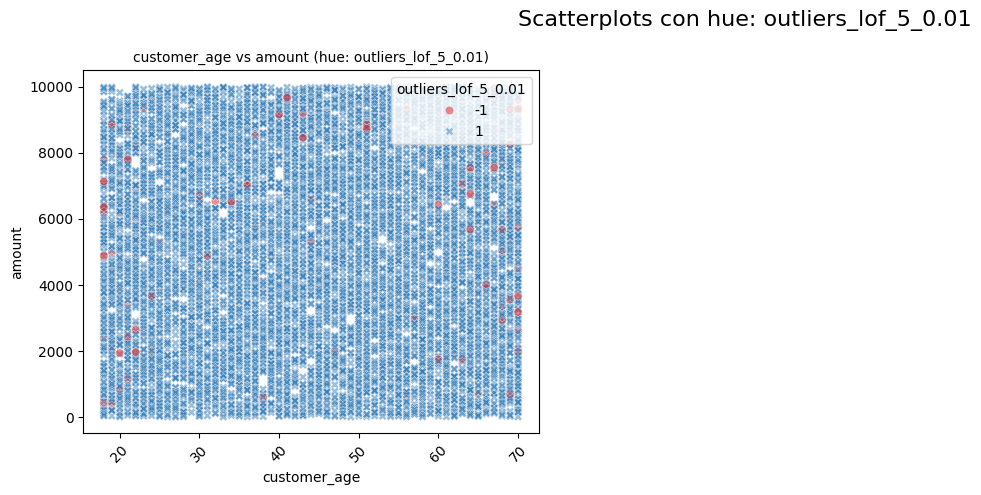

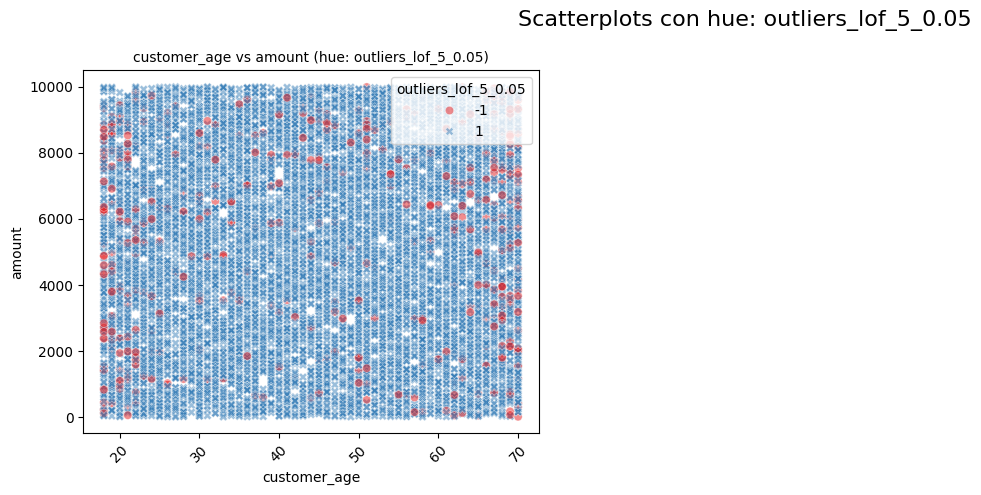

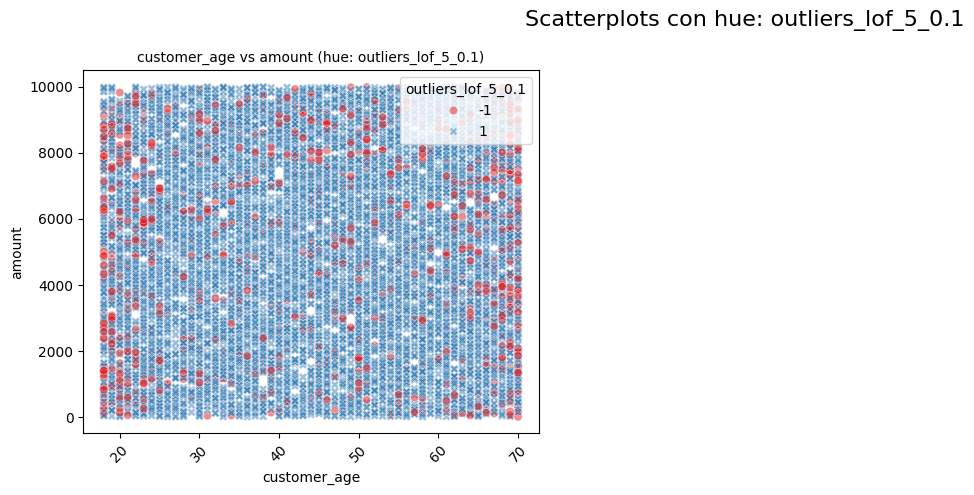

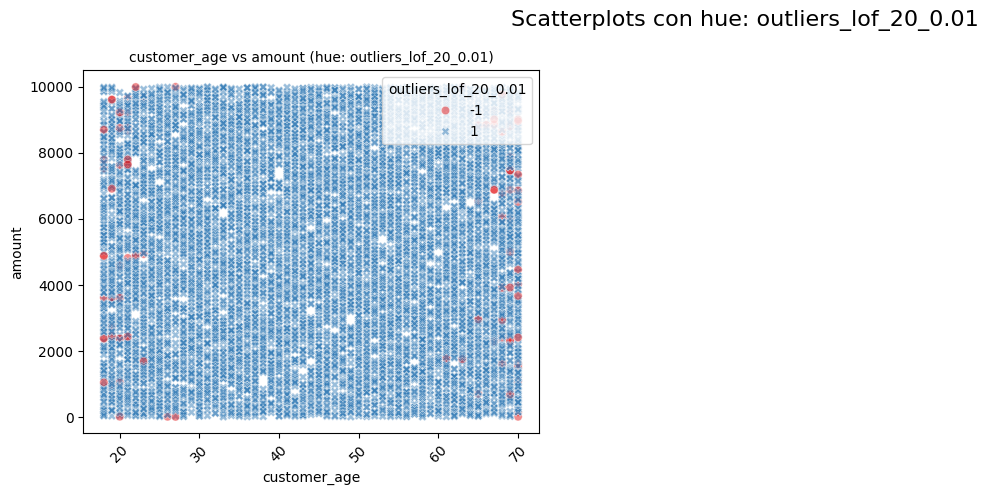

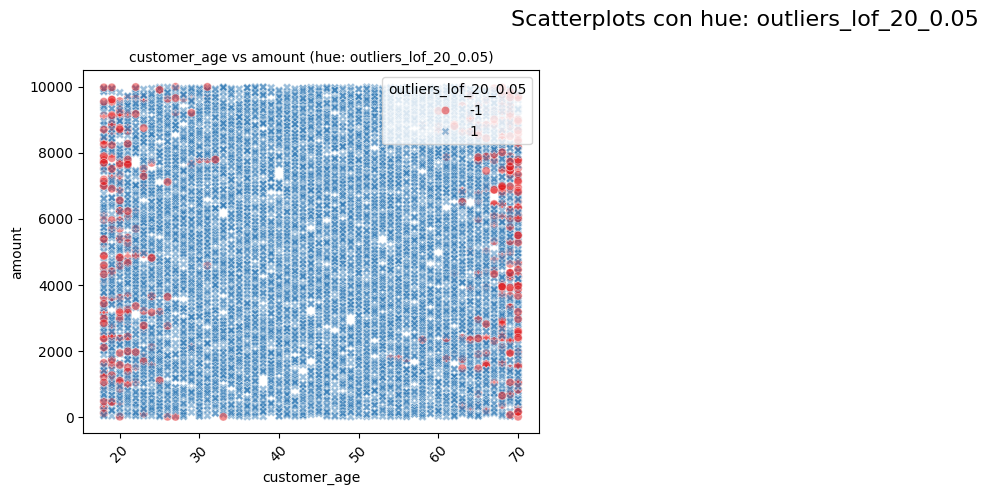

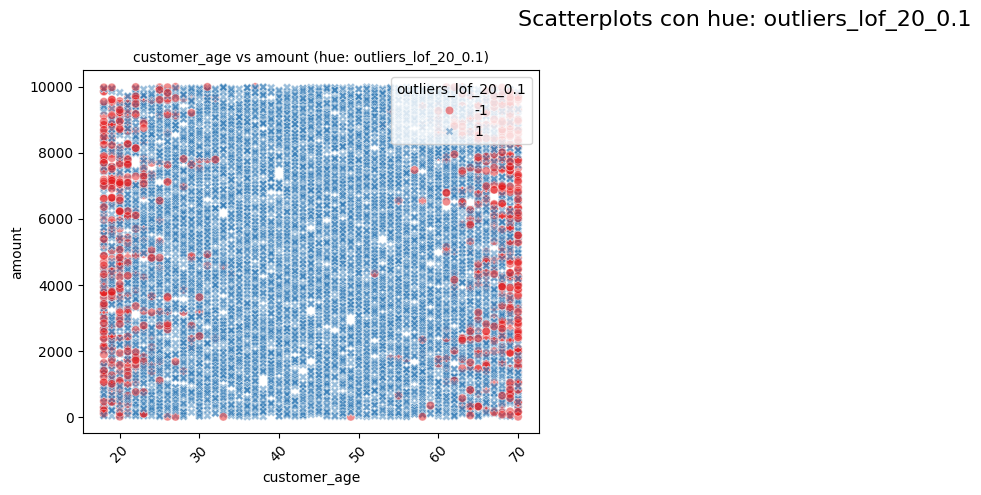

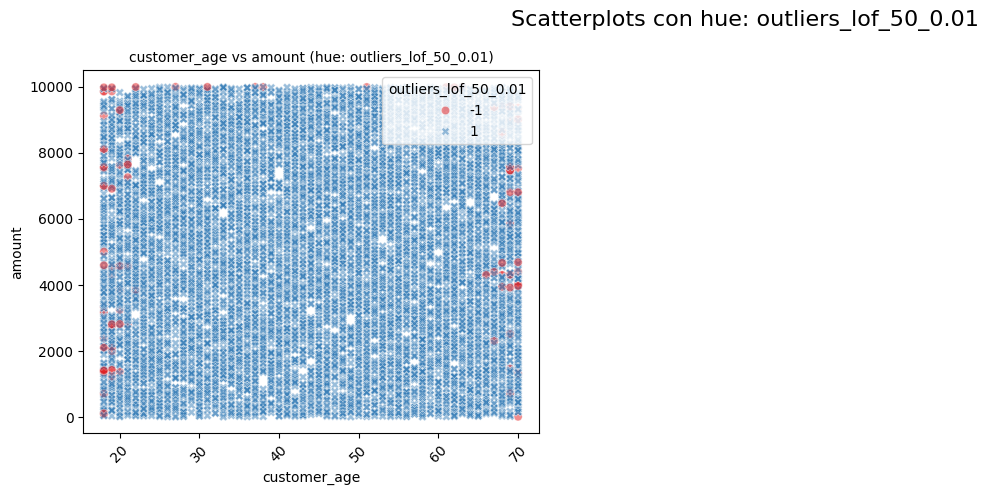

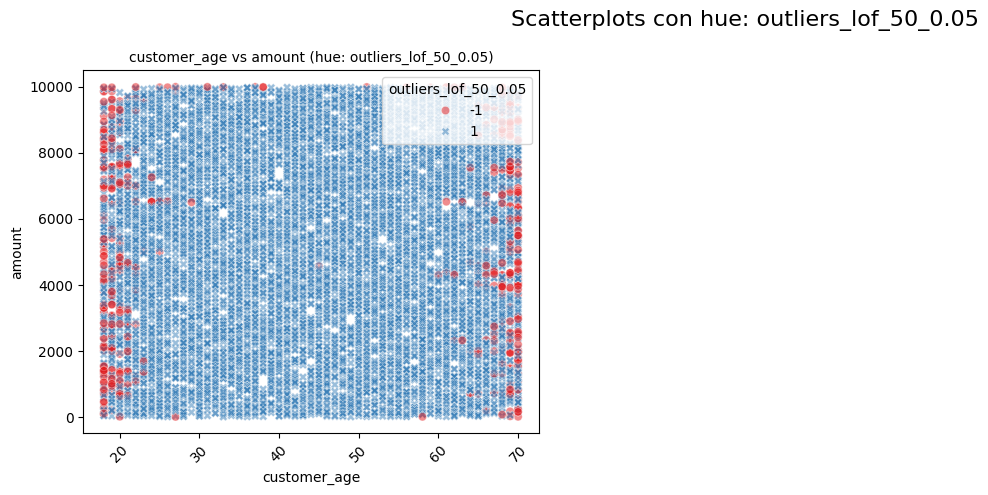

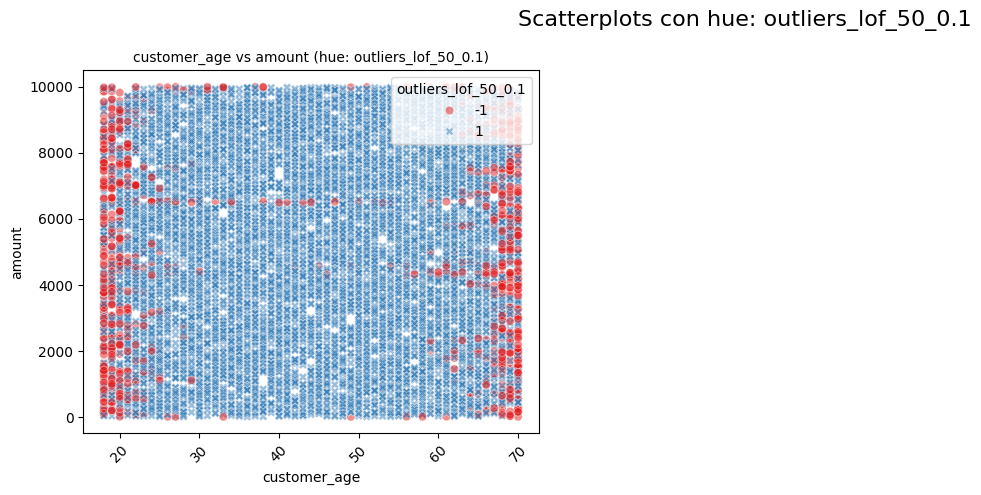

In [224]:
sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [225]:
cantidad = 7
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado.shape

(13, 15)

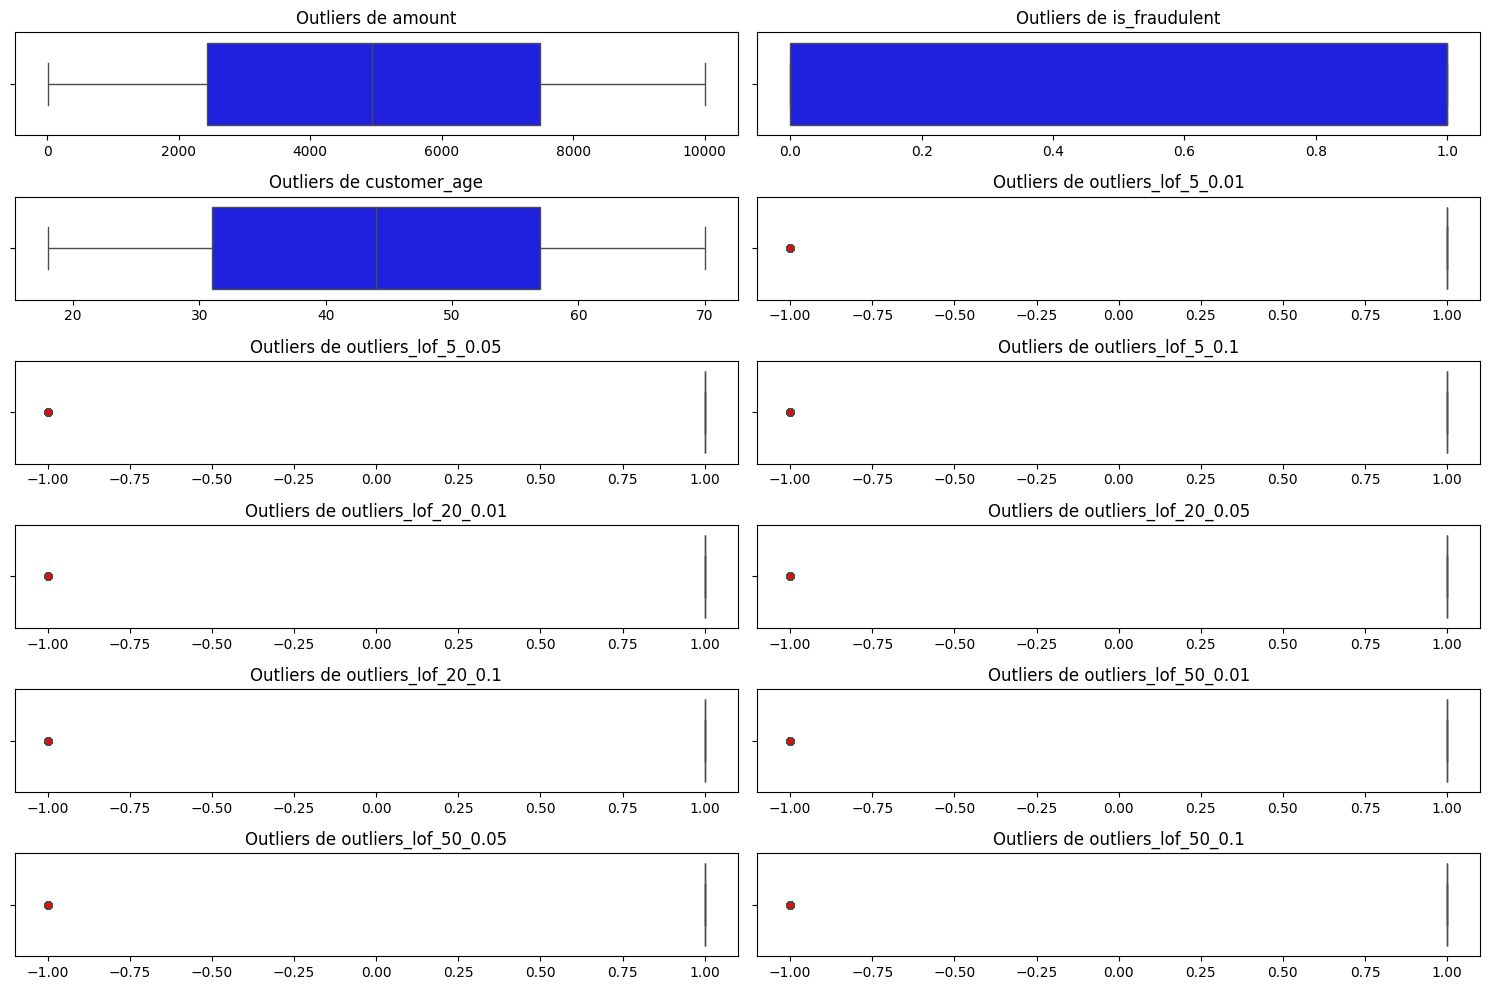

In [226]:
sp.detectar_outliers(df_lof)

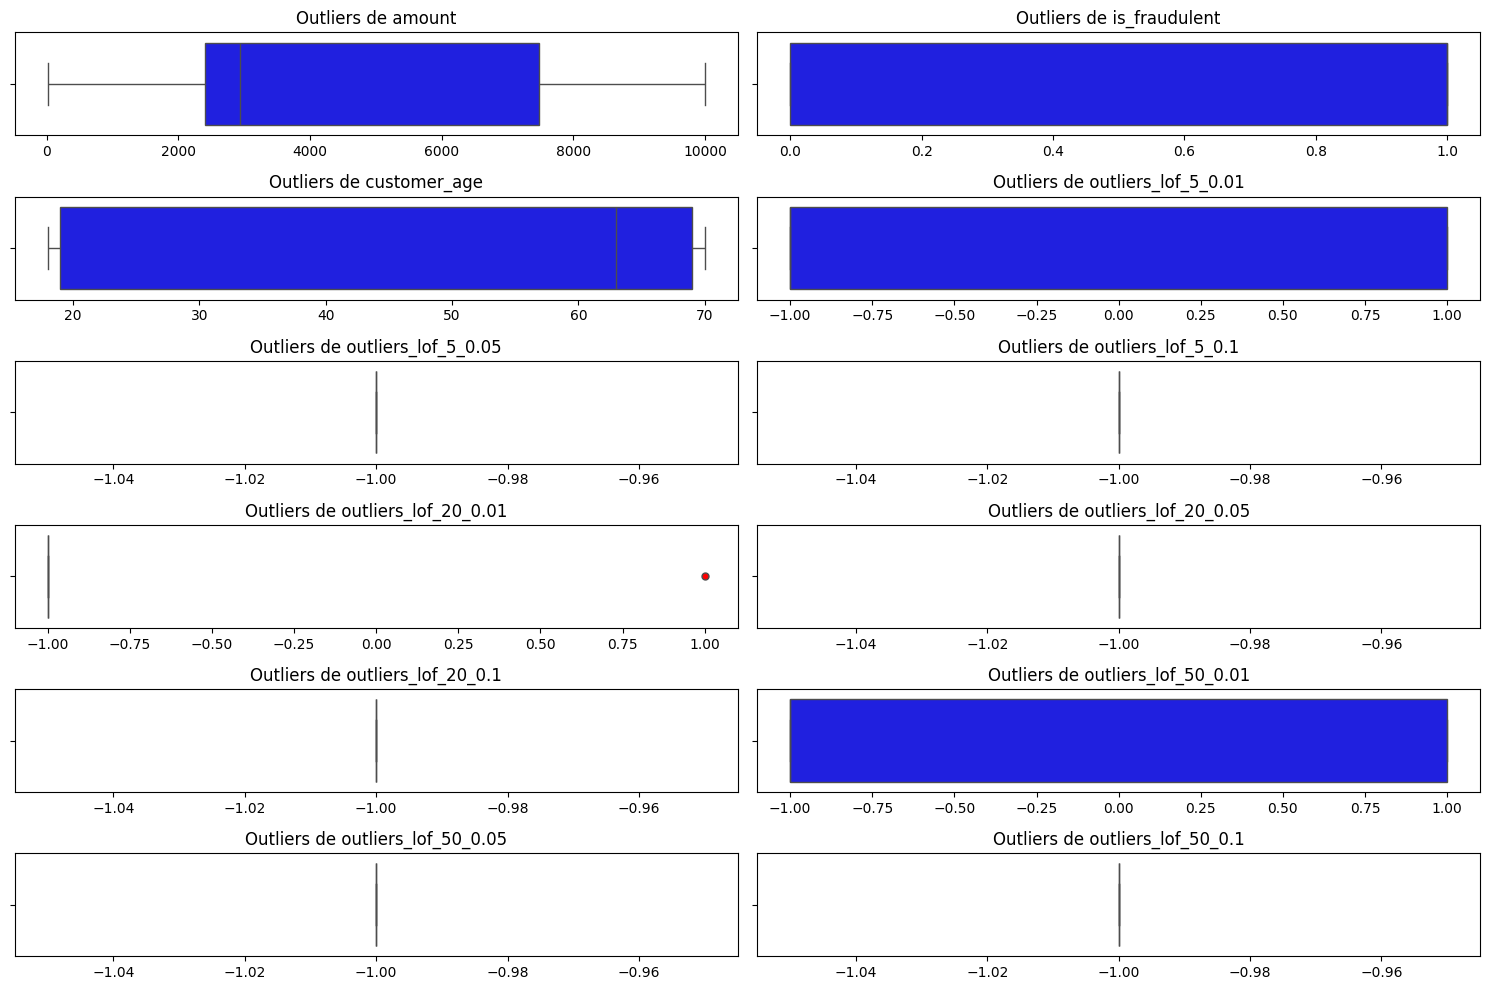

In [227]:
sp.detectar_outliers(df_filtrado)

In [228]:
df_filtrado.describe().T

count         mean          std    min      25%  \
amount                 13.0  4457.181538  3400.777530  14.24  2401.75   
is_fraudulent          13.0     0.538462     0.518875   0.00     0.00   
customer_age           13.0    45.076923    25.365533  18.00    19.00   
outliers_lof_5_0.01    13.0    -0.230769     1.012739  -1.00    -1.00   
outliers_lof_5_0.05    13.0    -1.000000     0.000000  -1.00    -1.00   
outliers_lof_5_0.1     13.0    -1.000000     0.000000  -1.00    -1.00   
outliers_lof_20_0.01   13.0    -0.846154     0.554700  -1.00    -1.00   
outliers_lof_20_0.05   13.0    -1.000000     0.000000  -1.00    -1.00   
outliers_lof_20_0.1    13.0    -1.000000     0.000000  -1.00    -1.00   
outliers_lof_50_0.01   13.0    -0.076923     1.037749  -1.00    -1.00   
outliers_lof_50_0.05   13.0    -1.000000     0.000000  -1.00    -1.00   
outliers_lof_50_0.1    13.0    -1.000000     0.000000  -1.00    -1.00   

                          50%     75%      max  
amount                2933.76  7471.3  9995.03  
is_fraudulent            1.00     1.0     1.00  
customer_age            63.00    69.0    70.00  
outliers_lof_5_0.01     -1.00     1.0     1.00  
outliers_lof_5_0.05     -1.00    -1.0    -1.00  
outliers_lof_5_0.1      -1.00    -1.0    -1.00  
outliers_lof_20_0.01    -1.00    -1.0     1.00  
outliers_lof_20_0.05    -1.00    -1.0    -1.00  
outliers_lof_20_0.1     -1.00    -1.0    -1.00  
outliers_lof_50_0.01    -1.00     1.0     1.00  
outliers_lof_50_0.05    -1.00    -1.0    -1.00  
outliers_lof_50_0.1     -1.00    -1.0    -1.00

In [229]:
df_lof.describe().T

count         mean          std    min       25%  \
amount                10000.0  4958.381617  2899.699675  10.61  2438.175   
is_fraudulent         10000.0     0.506800     0.499979   0.00     0.000   
customer_age          10000.0    44.047500    15.321707  18.00    31.000   
outliers_lof_5_0.01   10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_5_0.05   10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_5_0.1    10000.0     0.800000     0.600030  -1.00     1.000   
outliers_lof_20_0.01  10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_20_0.05  10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_20_0.1   10000.0     0.800000     0.600030  -1.00     1.000   
outliers_lof_50_0.01  10000.0     0.980000     0.199007  -1.00     1.000   
outliers_lof_50_0.05  10000.0     0.900000     0.435912  -1.00     1.000   
outliers_lof_50_0.1   10000.0     0.800000     0.600030  -1.00     1.000   

                           50%        75%      max  
amount                4943.945  7499.3125  9999.75  
is_fraudulent            1.000     1.0000     1.00  
customer_age            44.000    57.0000    70.00  
outliers_lof_5_0.01      1.000     1.0000     1.00  
outliers_lof_5_0.05      1.000     1.0000     1.00  
outliers_lof_5_0.1       1.000     1.0000     1.00  
outliers_lof_20_0.01     1.000     1.0000     1.00  
outliers_lof_20_0.05     1.000     1.0000     1.00  
outliers_lof_20_0.1      1.000     1.0000     1.00  
outliers_lof_50_0.01     1.000     1.0000     1.00  
outliers_lof_50_0.05     1.000     1.0000     1.00  
outliers_lof_50_0.1      1.000     1.0000     1.00

In [230]:
df.shape

(10000, 6)

In [231]:
# Eliminamos los outiers al considerarse pocos y que por esa variable puedan modificar el modelo
df2=df.drop(index = df_filtrado.index).reset_index(drop=True)

In [232]:
df2.shape

(9987, 6)

c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:163: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_counts = pd.concat([category_counts, null_series])
c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\alexc\Desktop\GIT\9.1.Preprocesamiento_vr_categorica\notebooks\../src\support_preprocesing.py:163: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when d

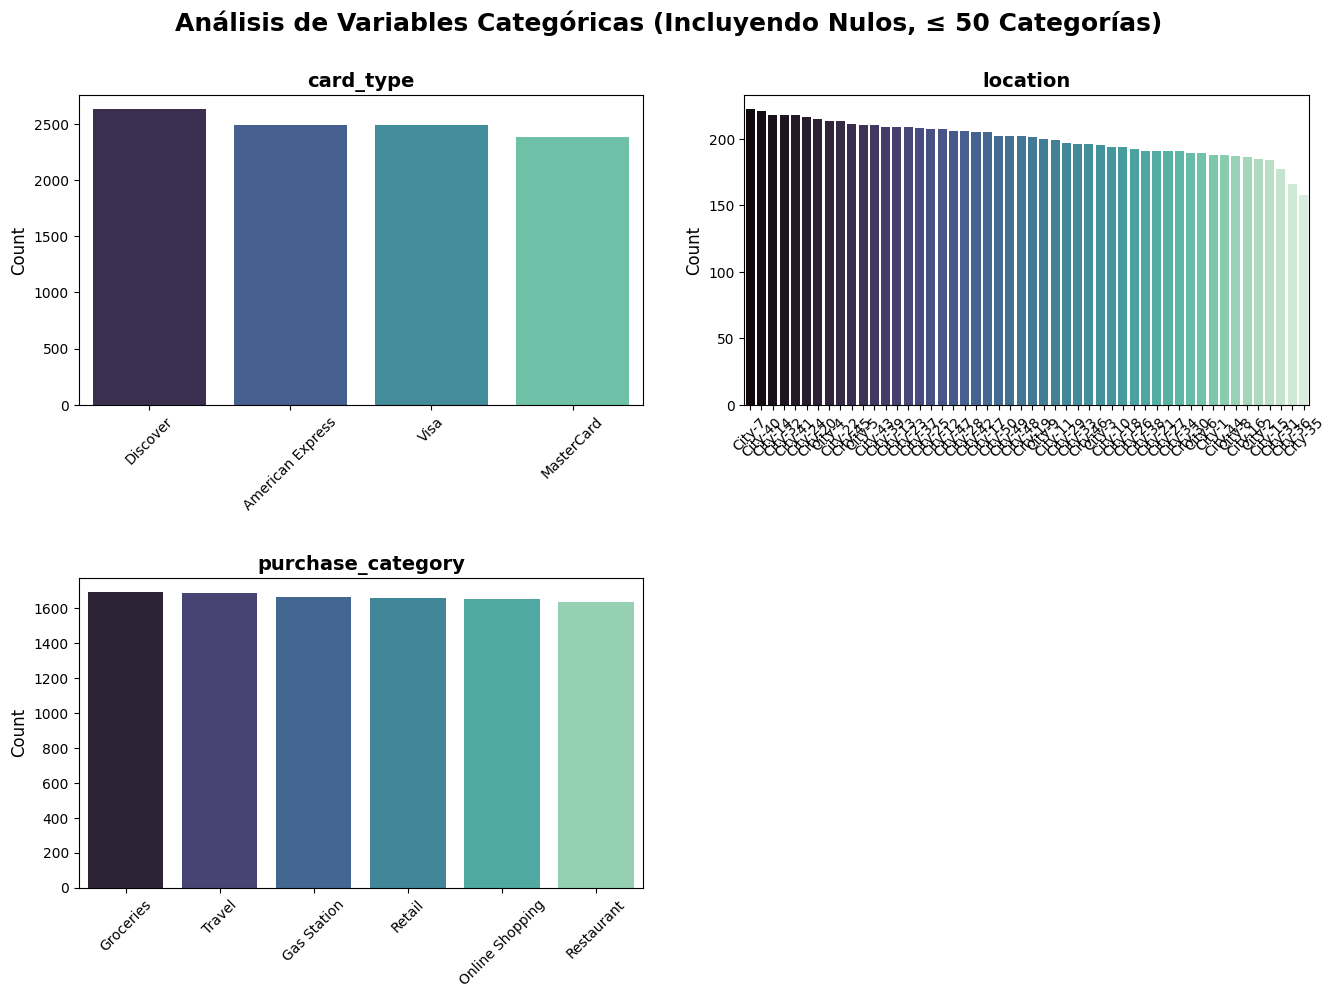

In [233]:
sp.plot_categoricas(df2,max_categories=50)

In [234]:
# Definir df_final 
df_final=df2

In [235]:
# df final para crear modelos
df_final.shape

(9987, 6)

ESTANDARIZACIÓN

In [236]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [237]:
# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

In [238]:
escalador_robust = RobustScaler()
suffix = "_robust"

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_robust = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df1 = pd.concat([df_final, df_scaled_robust], axis=1)

In [239]:
df1.head(1)

amount  is_fraudulent   card_type location purchase_category  \
0  5758.59              0  MasterCard  City-30       Gas Station   

   customer_age  amount_robust  is_fraudulent_robust  customer_age_robust  
0            43       0.160768                  -1.0            -0.038462

In [240]:
escalador_minmax = MinMaxScaler()
suffix = "_minmax"

# Aplica el escalador a las columnas numéricas
datos_transf_minmax = escalador_minmax.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_minmax = pd.DataFrame(datos_transf_minmax, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df2 = pd.concat([df_final, df_scaled_minmax], axis=1)

In [241]:
df2.head(1)

amount  is_fraudulent   card_type location purchase_category  \
0  5758.59              0  MasterCard  City-30       Gas Station   

   customer_age  amount_minmax  is_fraudulent_minmax  customer_age_minmax  
0            43       0.575423                   0.0             0.480769

In [242]:
escalador_norm = Normalizer()
suffix = "_norm"

# Aplica el escalador a las columnas numéricas
datos_transf_norm = escalador_norm.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_norm = pd.DataFrame(datos_transf_norm, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df3 = pd.concat([df_final, df_scaled_norm], axis=1)

In [243]:
df3.head(1)

amount  is_fraudulent   card_type location purchase_category  \
0  5758.59              0  MasterCard  City-30       Gas Station   

   customer_age  amount_norm  is_fraudulent_norm  customer_age_norm  
0            43     0.999972                 0.0           0.007467

In [244]:
escalador_stds = StandardScaler()
suffix = "_stds"

# Aplica el escalador a las columnas numéricas
datos_transfr_stds = escalador_stds.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_stds = pd.DataFrame(datos_transfr_stds, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df4 = pd.concat([df_final, df_scaled_stds], axis=1)

In [245]:
df4.head(1)

amount  is_fraudulent   card_type location purchase_category  \
0  5758.59              0  MasterCard  City-30       Gas Station   

   customer_age  amount_stds  is_fraudulent_stds  customer_age_stds  
0            43     0.275805            -1.01361          -0.068351

In [246]:
df_list=[df1,df2,df3,df4]

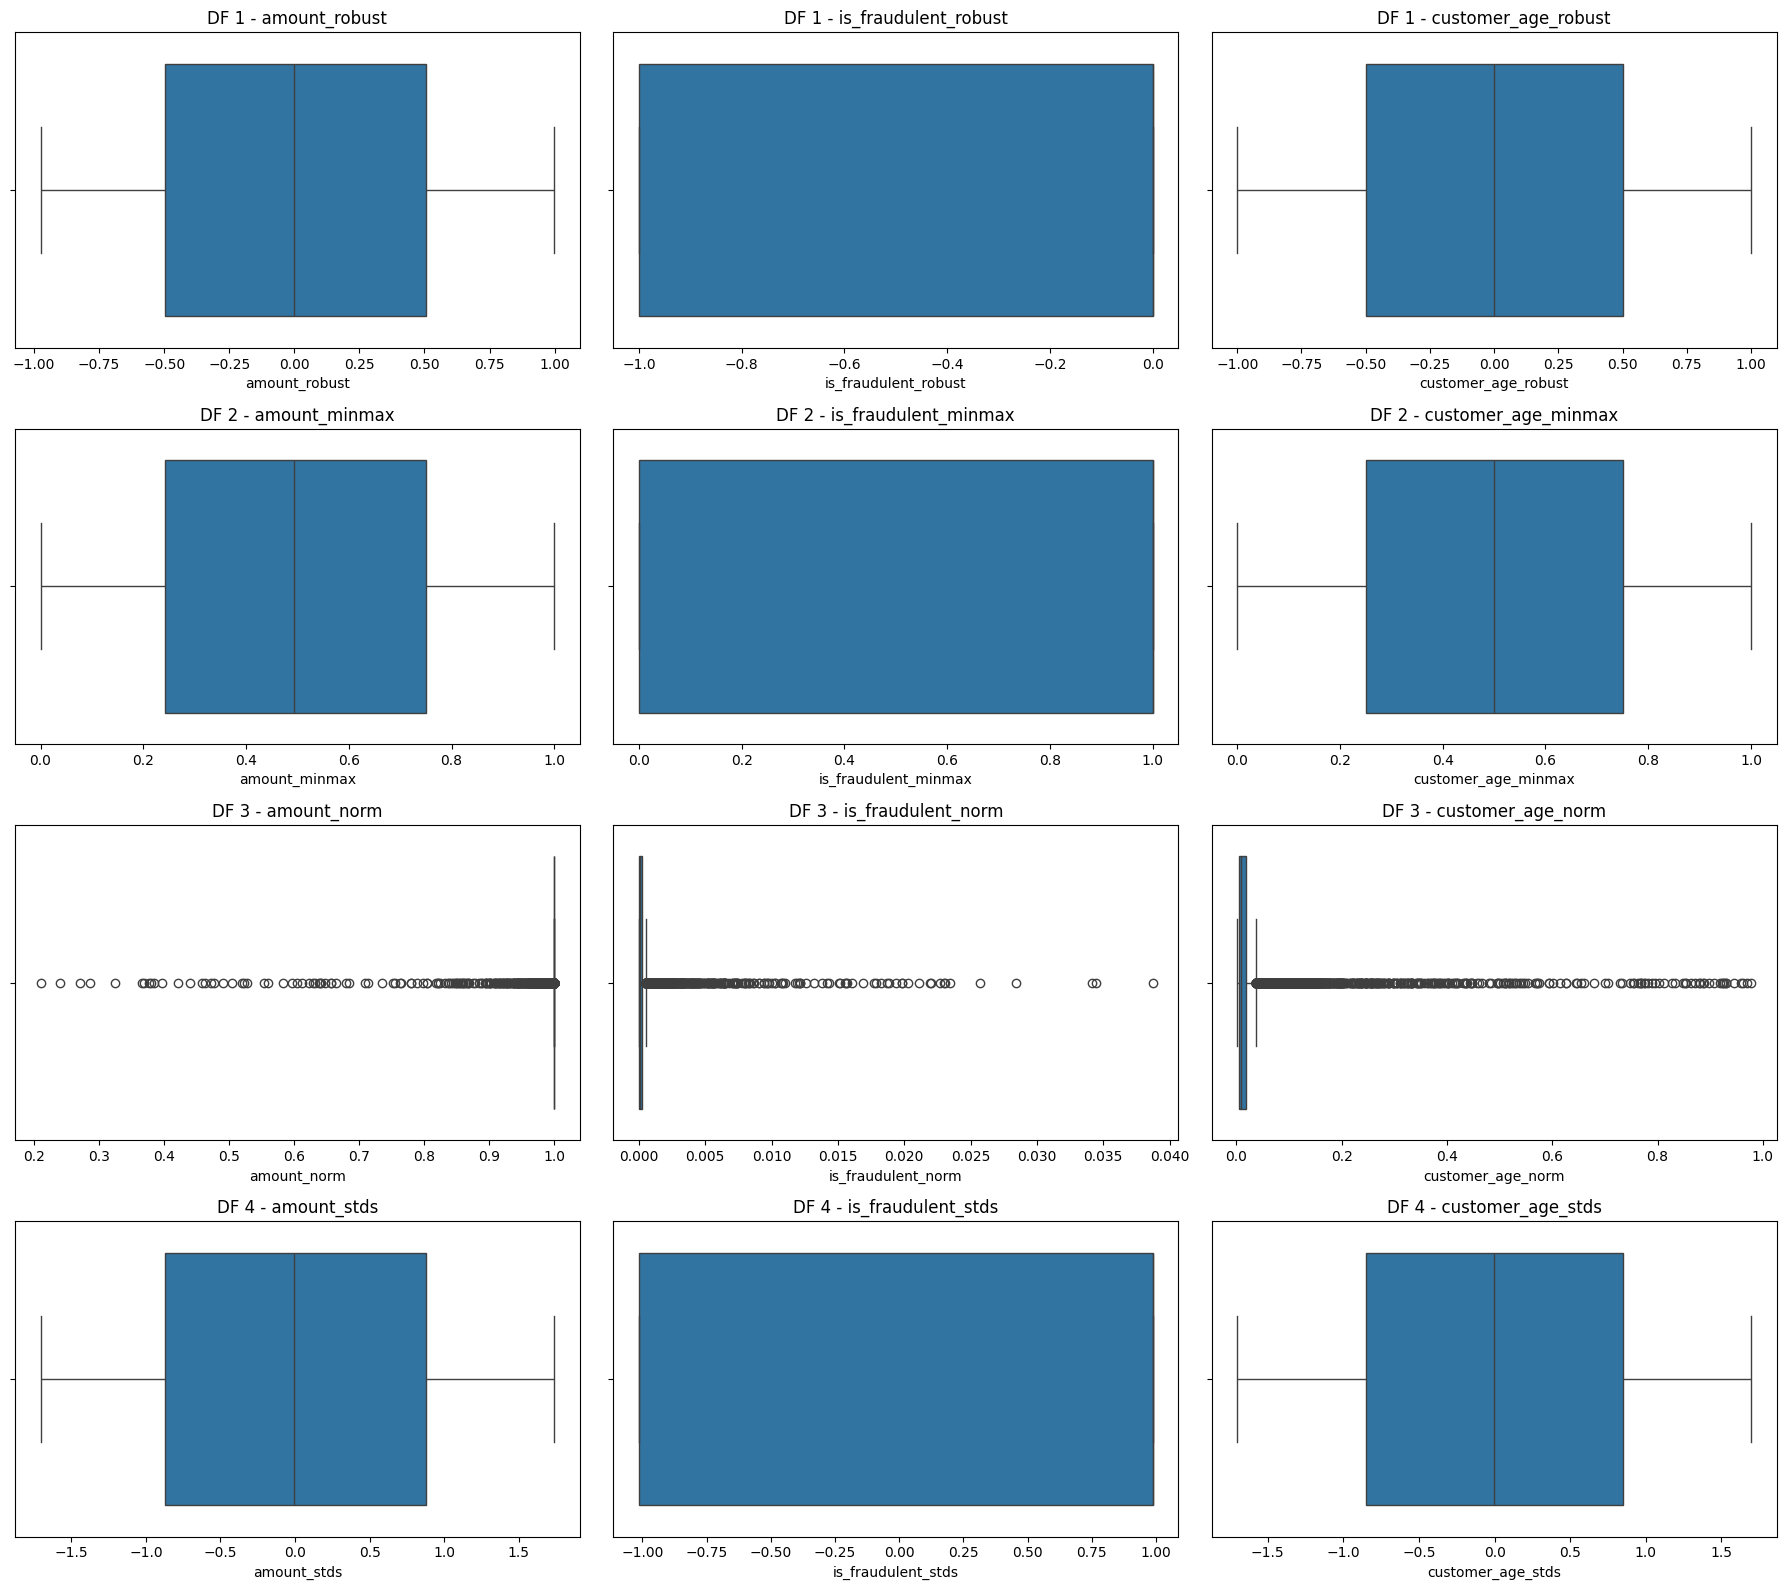

In [247]:
sp.generador_boxplots(df_list)

Una vez realizado la estandarizacion se opta por utilizar el metodo "Robust" para dar peso a los pocos outiers que hemos podido dejar en la muestra y que se tengan en cuenta en el modelo

In [248]:
df_final.head()

amount  is_fraudulent   card_type location purchase_category  customer_age
0  5758.59              0  MasterCard  City-30       Gas Station            43
1  1901.56              1        Visa  City-47   Online Shopping            61
2  1248.86              1  MasterCard   City-6       Gas Station            57
3  7619.05              1    Discover   City-6            Travel            59
4  1890.10              1  MasterCard  City-34            Retail            36

In [258]:
df_estandarizado = pd.concat([df_final, df_scaled_robust], axis=1)
df_estandarizado=df_estandarizado.drop(columns=["amount","customer_age","is_fraudulent_robust","location"])

In [259]:
df_estandarizado.sample(10)

is_fraudulent         card_type purchase_category  amount_robust  \
2735              1  American Express            Retail       0.538892   
722               1  American Express        Restaurant       0.854406   
1245              0              Visa   Online Shopping       0.685236   
3883              1              Visa   Online Shopping      -0.791678   
4675              0        MasterCard            Retail       0.447230   
2726              0              Visa       Gas Station       0.133233   
3712              0        MasterCard            Retail      -0.913090   
6089              0              Visa            Retail      -0.407638   
7086              0          Discover            Retail      -0.753055   
680               0              Visa         Groceries       0.279031   

      customer_age_robust  
2735             0.076923  
722             -0.153846  
1245            -0.576923  
3883             0.807692  
4675            -0.115385  
2726            -0.346154  
3712            -0.730769  
6089            -0.192308  
7086             0.538462  
680              0.692308

Ahora procedemos con el Encoding de las variables categoricas

In [260]:
df_estandarizado.dtypes

is_fraudulent            int64
card_type               object
purchase_category       object
amount_robust          float64
customer_age_robust    float64
dtype: object

In [261]:
lista_col_categ = df_estandarizado.select_dtypes(include="O").columns.tolist()
lista_col_categ

['card_type', 'purchase_category']

In [262]:
lista_col_num = df_estandarizado.select_dtypes(include=np.number).columns.tolist()
lista_col_num

['is_fraudulent', 'amount_robust', 'customer_age_robust']

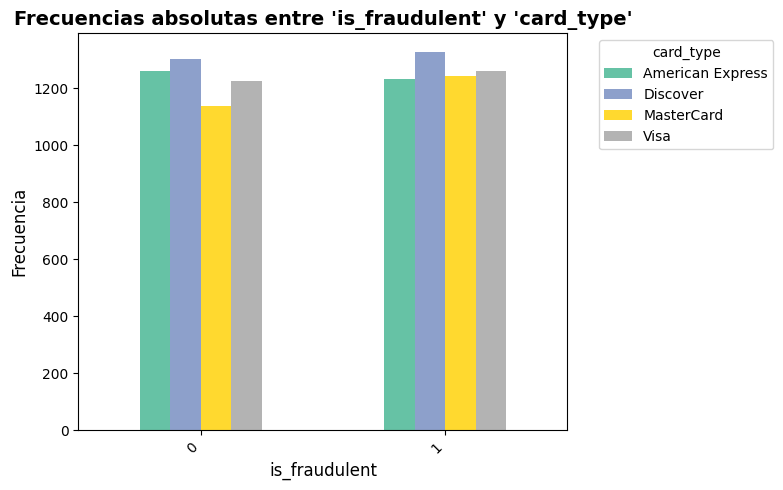

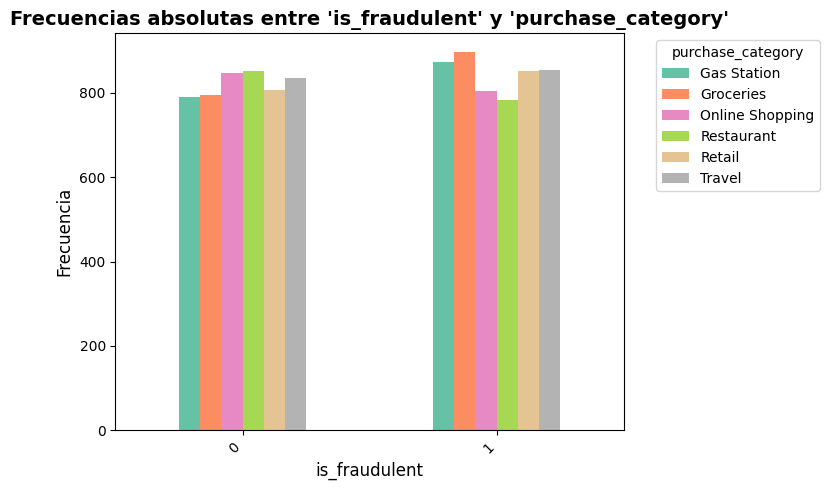

In [263]:
sp.relacion_vr_categoricas_barras_agrupadas(df_estandarizado,"is_fraudulent")

In [264]:
df_estandarizado.head()

is_fraudulent   card_type purchase_category  amount_robust  \
0              0  MasterCard       Gas Station       0.160768   
1              1        Visa   Online Shopping      -0.601375   
2              1  MasterCard       Gas Station      -0.730347   
3              1    Discover            Travel       0.528392   
4              1  MasterCard            Retail      -0.603639   

   customer_age_robust  
0            -0.038462  
1             0.653846  
2             0.500000  
3             0.576923  
4            -0.307692

In [265]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [267]:
# Seleccionar las columnas categóricas (excluyendo la variable respuesta)
categorical_columns = ['card_type', 'purchase_category']

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar las columnas categóricas
encoded_data = encoder.fit_transform(df_estandarizado[categorical_columns])

# Convertir los datos codificados en un DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Eliminar las columnas categóricas originales y concatenar las codificadas
df_encoded = pd.concat([df_estandarizado.drop(columns=categorical_columns), encoded_df], axis=1)

# Guardar el nuevo DataFrame en un archivo CSV
df_encoded.to_csv('../results/data_encoded.csv' , index=False)

In [268]:
df_encoded.sample(5)

is_fraudulent  amount_robust  customer_age_robust  card_type_Discover  \
2852              0      -0.461230             0.384615                 0.0   
4898              0       0.846950             0.423077                 0.0   
9326              1      -0.028083             0.384615                 0.0   
9145              1       0.423301             0.730769                 1.0   
9697              0      -0.152991             0.000000                 0.0   

      card_type_MasterCard  card_type_Visa  purchase_category_Groceries  \
2852                   0.0             0.0                          0.0   
4898                   0.0             0.0                          0.0   
9326                   1.0             0.0                          0.0   
9145                   0.0             0.0                          0.0   
9697                   0.0             1.0                          0.0   

      purchase_category_Online Shopping  purchase_category_Restaurant  \
2852                                0.0                           0.0   
4898                                0.0                           0.0   
9326                                0.0                           0.0   
9145                                0.0                           0.0   
9697                                0.0                           1.0   

      purchase_category_Retail  purchase_category_Travel  
2852                       1.0                       0.0  
4898                       1.0                       0.0  
9326                       0.0                       1.0  
9145                       0.0                       0.0  
9697                       0.0                       0.0